In [28]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

In [29]:
# Load and preprocess the data
max_features = 10_000  # 400 -> 10_000
maxlen = 300

In [30]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [31]:
# Define the LSTM model
model = Sequential()

model.add(Embedding(max_features, 128))  # 32 -> 128
model.add(LSTM(64, return_sequences=True))  # 4 -> 64, return_sequences=True
model.add(Dropout(0.5))  # Nueva capa Dropout 
model.add(LSTM(32))  # Nueva capa LSTM
model.add(Dropout(0.5))  # Nueva capa Dropout

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=3, 
    batch_size=64, 
    validation_data=(X_test, y_test)
)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 275ms/step - accuracy: 0.7230 - loss: 0.5228 - val_accuracy: 0.8563 - val_loss: 0.3424
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 291ms/step - accuracy: 0.9070 - loss: 0.2471 - val_accuracy: 0.8422 - val_loss: 0.3730
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 299ms/step - accuracy: 0.9306 - loss: 0.1920 - val_accuracy: 0.8439 - val_loss: 0.4386


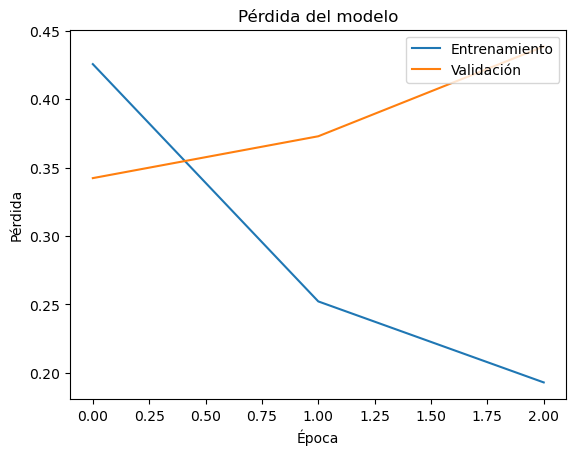

In [33]:
# Graficar la pérdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8394 - loss: 0.4455
Loss: 0.4386448860168457, Accuracy: 0.8439199924468994


782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

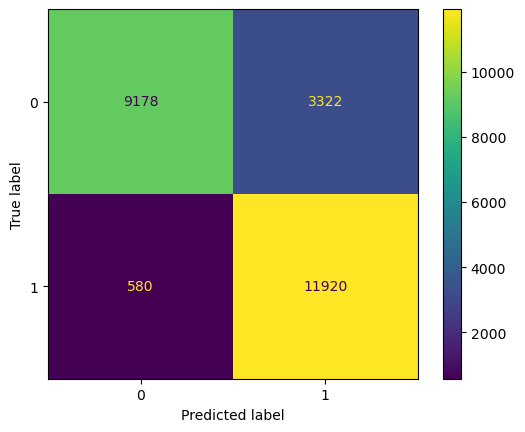

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix
